In [1]:
print("Multimedia Security Experiment 14")

Multimedia Security Experiment 14


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import myipf # 前面的实验编写的函数
from matplotlib.gridspec import GridSpec
#from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
plt.rcParams["font.sans-serif"] = ["SimHei"] # 用来正常显示中文
plt.rcParams["axes.unicode_minus"] = False # 用来正常显示负号
%config InlineBackend.figure_format = "svg"

In [3]:
img = plt.imread("standard_test_images/lena_gray_256.tif")

## Patchwork与多重水印

In [26]:
def patchworkI(src, d=2.3):
    dst_image = myipf.grayImageJudge(src)
    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            if (i+j) % 2 == 0:
                dst_image[i][j] = src[i][j] + d
            else:
                dst_image[i][j] = src[i][j] - d
    
    return dst_image

def detectWatermarkI(src, d=2.3, r=1.6):
    sum_p, sum_m = 0, 0
    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            if (i+j) % 2 == 0:
                sum_p += src[i][j]
            else:
                sum_m += src[i][j]
    avg_p = (sum_p * 2)/ (src.shape[0] * src.shape[1])
    avg_m = (sum_m * 2)/ (src.shape[0] * src.shape[1])
    if (avg_p - avg_m) > r*d:
        print("Watermark: 1");
    else:
        print("Watermark: 0");

In [73]:
imgI = patchworkI(img, 2)
detectWatermarkI(imgI, 2)

Watermark: 1


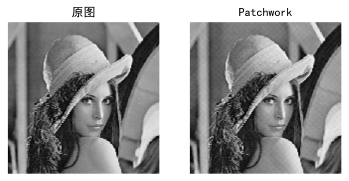

均方差： 4.0
峰值信噪比： 42.11020369539948


In [74]:
plt.subplot(1, 2, 1), plt.imshow(img, cmap="gray"), plt.axis("off"), plt.title("原图")
plt.subplot(1, 2, 2), plt.imshow(imgI, cmap="gray"), plt.axis("off"), plt.title("Patchwork")
plt.show()
myipf.calcMSEPSNR(img, imgI)

In [80]:
def patchworkII(src, d=2.3, seed=65537):
    vec_image = myipf.grayImageJudge(src).flatten()
    dst_image = np.zeros(src.shape, np.uint8)
    n = int(np.floor(src.shape[0]*src.shape[1]/10))
    np.random.seed(seed)
    random_list = np.random.rand(n)
    length = src.shape[0] * src.shape[1]
    for k in range(n):
        if random_list[k] >= 0.5:
            vec_image[k*10]   += d
            vec_image[k*10+1] -= d
    for i in range(src.shape[0]):
        for j in range(src.shape[1]):
            dst_image[i][j] = vec_image[i*src.shape[0]+j]
    
    return dst_image

def detectWatermarkII(src, d=2.3, r=1.6, seed=65537):
    vec_image = myipf.grayImageJudge(src).flatten()
    n = int(np.floor(src.shape[0]*src.shape[1]/10))
    np.random.seed(seed)
    random_list = np.random.rand(n)
    sum_p, sum_m, cnt = 0, 0, 0
    for k in range(n):
        if random_list[k] >= 0.5:
            sum_p += vec_image[k*10]
            sum_m += vec_image[k*10+1]
            cnt   += 1
    avg_p = sum_p/cnt
    avg_m = sum_m/cnt
    if (avg_p - avg_m) > r*d:
        print("Watermark: 1");
    else:
        print("Watermark: 0");

In [81]:
imgII = patchworkII(img, 2)
detectWatermarkII(imgII, 2)

Watermark: 1


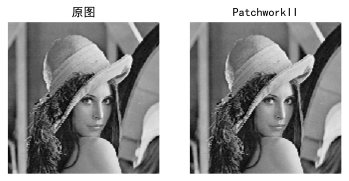

均方差： 0.403076171875
峰值信噪比： 52.07693235572891


In [82]:
plt.subplot(1, 2, 1), plt.imshow(img, cmap="gray"), plt.axis("off"), plt.title("原图")
plt.subplot(1, 2, 2), plt.imshow(imgII, cmap="gray"), plt.axis("off"), plt.title("PatchworkII")
plt.show()
myipf.calcMSEPSNR(img, imgII)

In [ ]:
def doubleWatermark(src):
    